# Activation analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

% load file names 

In [9]:
import os
import pandas as pd

Emil = False

if Emil:
    base_path = r"C:\Users\ASUS\Documents\11. sem - kand\Data\Frequency"
else:
    base_path = r"C:\Users\Gustav\Documents\Thesis\data\Frequency"


In [10]:
import os

# Specify the folder path
folder_path = base_path

# Get a list of all files in the folder
file_names = os.listdir(folder_path)


In [11]:
import os
import pandas as pd

# Create a dictionary to store the loaded dataframes
dataframes = {}

# Create a list to store the dataframe names
dataframe_names = []

# Load the CSV files and store them in the dictionary
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    dataframe_name = file_name  # Remove the ".csv" extension and the first 3 characters, so only the CD numer is there
    dataframes[dataframe_name] = pd.read_csv(file_path, parse_dates=['Time'])
    dataframe_names.append(dataframe_name)


KeyboardInterrupt: 

In [ ]:
dataframes

In [ ]:
type(dataframes["2022-03-23.csv"])

In [ ]:
dataframes["2022-03-23.csv"]["Value"]

In [139]:
df_dataframes = []

start_date = '2022-03-23'
end_date = '2023-03-22'

dates = pd.date_range(start=start_date, end=end_date)
for date in dates:
    specific_dataframe = dataframes[date.strftime('%Y-%m-%d') + ".csv"]
    df_dataframes += [item for item in specific_dataframe['Value'][::50]]

In [140]:
len(df_dataframes)

6302570

In [141]:
counter_under = 0
counter_over = 0

for i in range(0,len(df_dataframes)):
    if df_dataframes[i] <= 49.9:
        counter_under += 1
    if df_dataframes[i] >= 50.1:
        counter_over += 1

In [142]:
counter_under,counter_over

(51919, 63392)

In [143]:
counter_under/len(df_dataframes)*100 , counter_over/len(df_dataframes)*100

(0.8237750631885088, 1.0058119148220488)

In [150]:
len(df_dataframes[0:17280])

17280

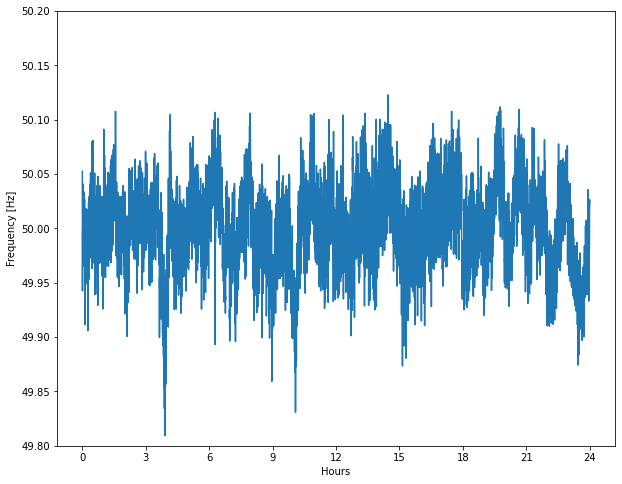

In [166]:
new_x_ticks = np.linspace(0, 24, 17280)
new_x_ticks

plt.figure(figsize=(10, 8))

plt.plot(new_x_ticks, df_dataframes[0:17280])
plt.ylim(49.8,50.2)
new_x_axis = [0,3,6,9,12,15,18,21,24]  # Replace with your desired x-axis values
plt.xticks(new_x_axis)
plt.xlabel('Hours')
plt.ylabel('Frequency [Hz]')
plt.show()

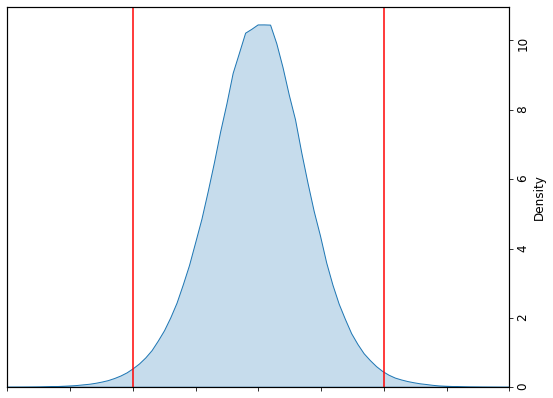

In [195]:
#fig = plt.subplots()
plt.figure(figsize=(9, 7))

sns.kdeplot(df_dataframes, fill=True)
plt.axvline(x=49.9, color='red', linestyle='-')
plt.axvline(x=50.1, color='red', linestyle='-')
plt.xlim(49.8, 50.2)
plt.xticks(rotation=90)
plt.gca().invert_xaxis() # inverts the plot
plt.gca().set_xticklabels([])

ax = plt.gca()
ax.yaxis.tick_right()
plt.yticks(rotation=90)
ax.set_ylabel('Density', labelpad=-539, fontsize=12)
plt.yticks(fontsize=12)

# Make the frame lines thinner
plt.gca().spines['top'].set_linewidth(1.2)    # Top border
plt.gca().spines['right'].set_linewidth(1.2)  # Right border
plt.gca().spines['bottom'].set_linewidth(1.2) # Bottom border
plt.gca().spines['left'].set_linewidth(1.2)   # Left border


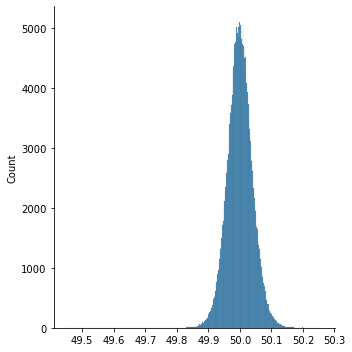

In [57]:
sns.displot(df_dataframes);